In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from google.colab import files
import io

In [6]:
files = files.upload()

Saving dataset.csv to dataset (1).csv


In [7]:
df = pd.read_csv(io.StringIO(files['dataset.csv'].decode('latin-1')))

df.tail()

,sr2,rr,t,lm,bo,rem,sr,hr,sl
625,69.60,20.96,92.96,10.96,90.96,89.80,3.44,62.40,2
626,48.44,17.38,98.06,6.75,96.38,73.76,8.38,53.44,0
627,97.50,27.50,86.88,17.75,84.26,101.88,0.00,78.76,4
628,58.64,19.73,95.73,9.73,94.59,84.32,6.73,59.32,1
629,73.92,21.39,93.39,11.39,91.39,91.96,4.09,63.48,2


In [8]:
df.columns

Index(['sr2', 'rr', 't', 'lm', 'bo', 'rem', 'sr', 'hr', 'sl'], dtype='object')

1. (i) 
###-Dataset is a numerical data
###-We can use classification
### Column labeling:
snoring range of the user: sr2, 
respiration rate: rr, 
body temperature: t, 
limb movement rate: lm, 
blood oxygen levels: bo, 
eye movement: rem,
number of hours of sleep: sr, 
heart rate: hr and 
Stress Levels: sl (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) 

Descriptive analysis: 


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sr2,630.00,71.60,19.37,45.00,52.50,70.00,91.25,100.00
rr,630.00,21.80,3.97,16.00,18.50,21.00,25.00,30.00
t,630.00,92.80,3.53,85.00,90.50,93.00,95.50,99.00
lm,630.00,11.70,4.30,4.00,8.50,11.00,15.75,19.00
bo,630.00,90.90,3.90,82.00,88.50,91.00,94.25,97.00
rem,630.00,88.50,11.89,60.00,81.25,90.00,98.75,105.00
sr,630.00,3.70,3.05,0.00,0.50,3.50,6.50,9.00
hr,630.00,64.50,9.92,50.00,56.25,62.50,72.50,85.00
sl,630.00,2.00,1.42,0.00,1.00,2.00,3.00,4.00


Multivariate data plot


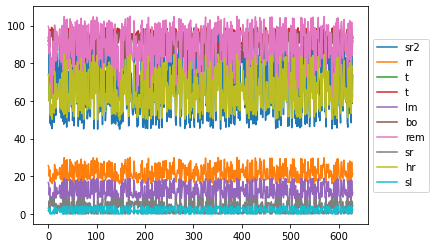

In [10]:
ax = df[["sr2","rr","t","t","lm","bo", "rem", "sr", "hr", "sl"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Here we can see the variation in the each of the data deatures by ploting the each sample value.

In [11]:
df.apply(np.std)

sr2   19.36
rr     3.96
t      3.53
lm     4.30
bo     3.90
rem   11.88
sr     3.05
hr     9.91
sl     1.41
dtype: float64

Here we can see that data need to be standerized after analysing the SD of the data as sr2 and rem value is higher than others.

(vi) Data visualization with seaborn and matplotlib

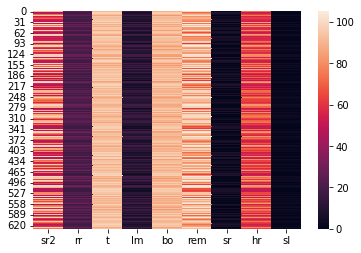

In [12]:
sns.heatmap(df)

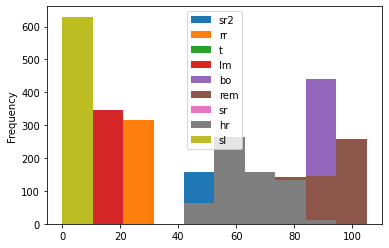

In [13]:
df.plot(kind="hist")

(ii) Correlation

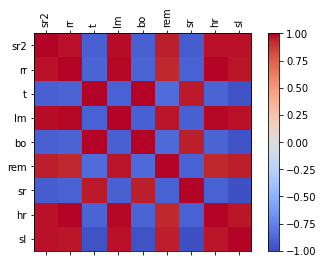

In [14]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Here its visible that sl has clear corelation with the other values whether its positive or negative independent variables.

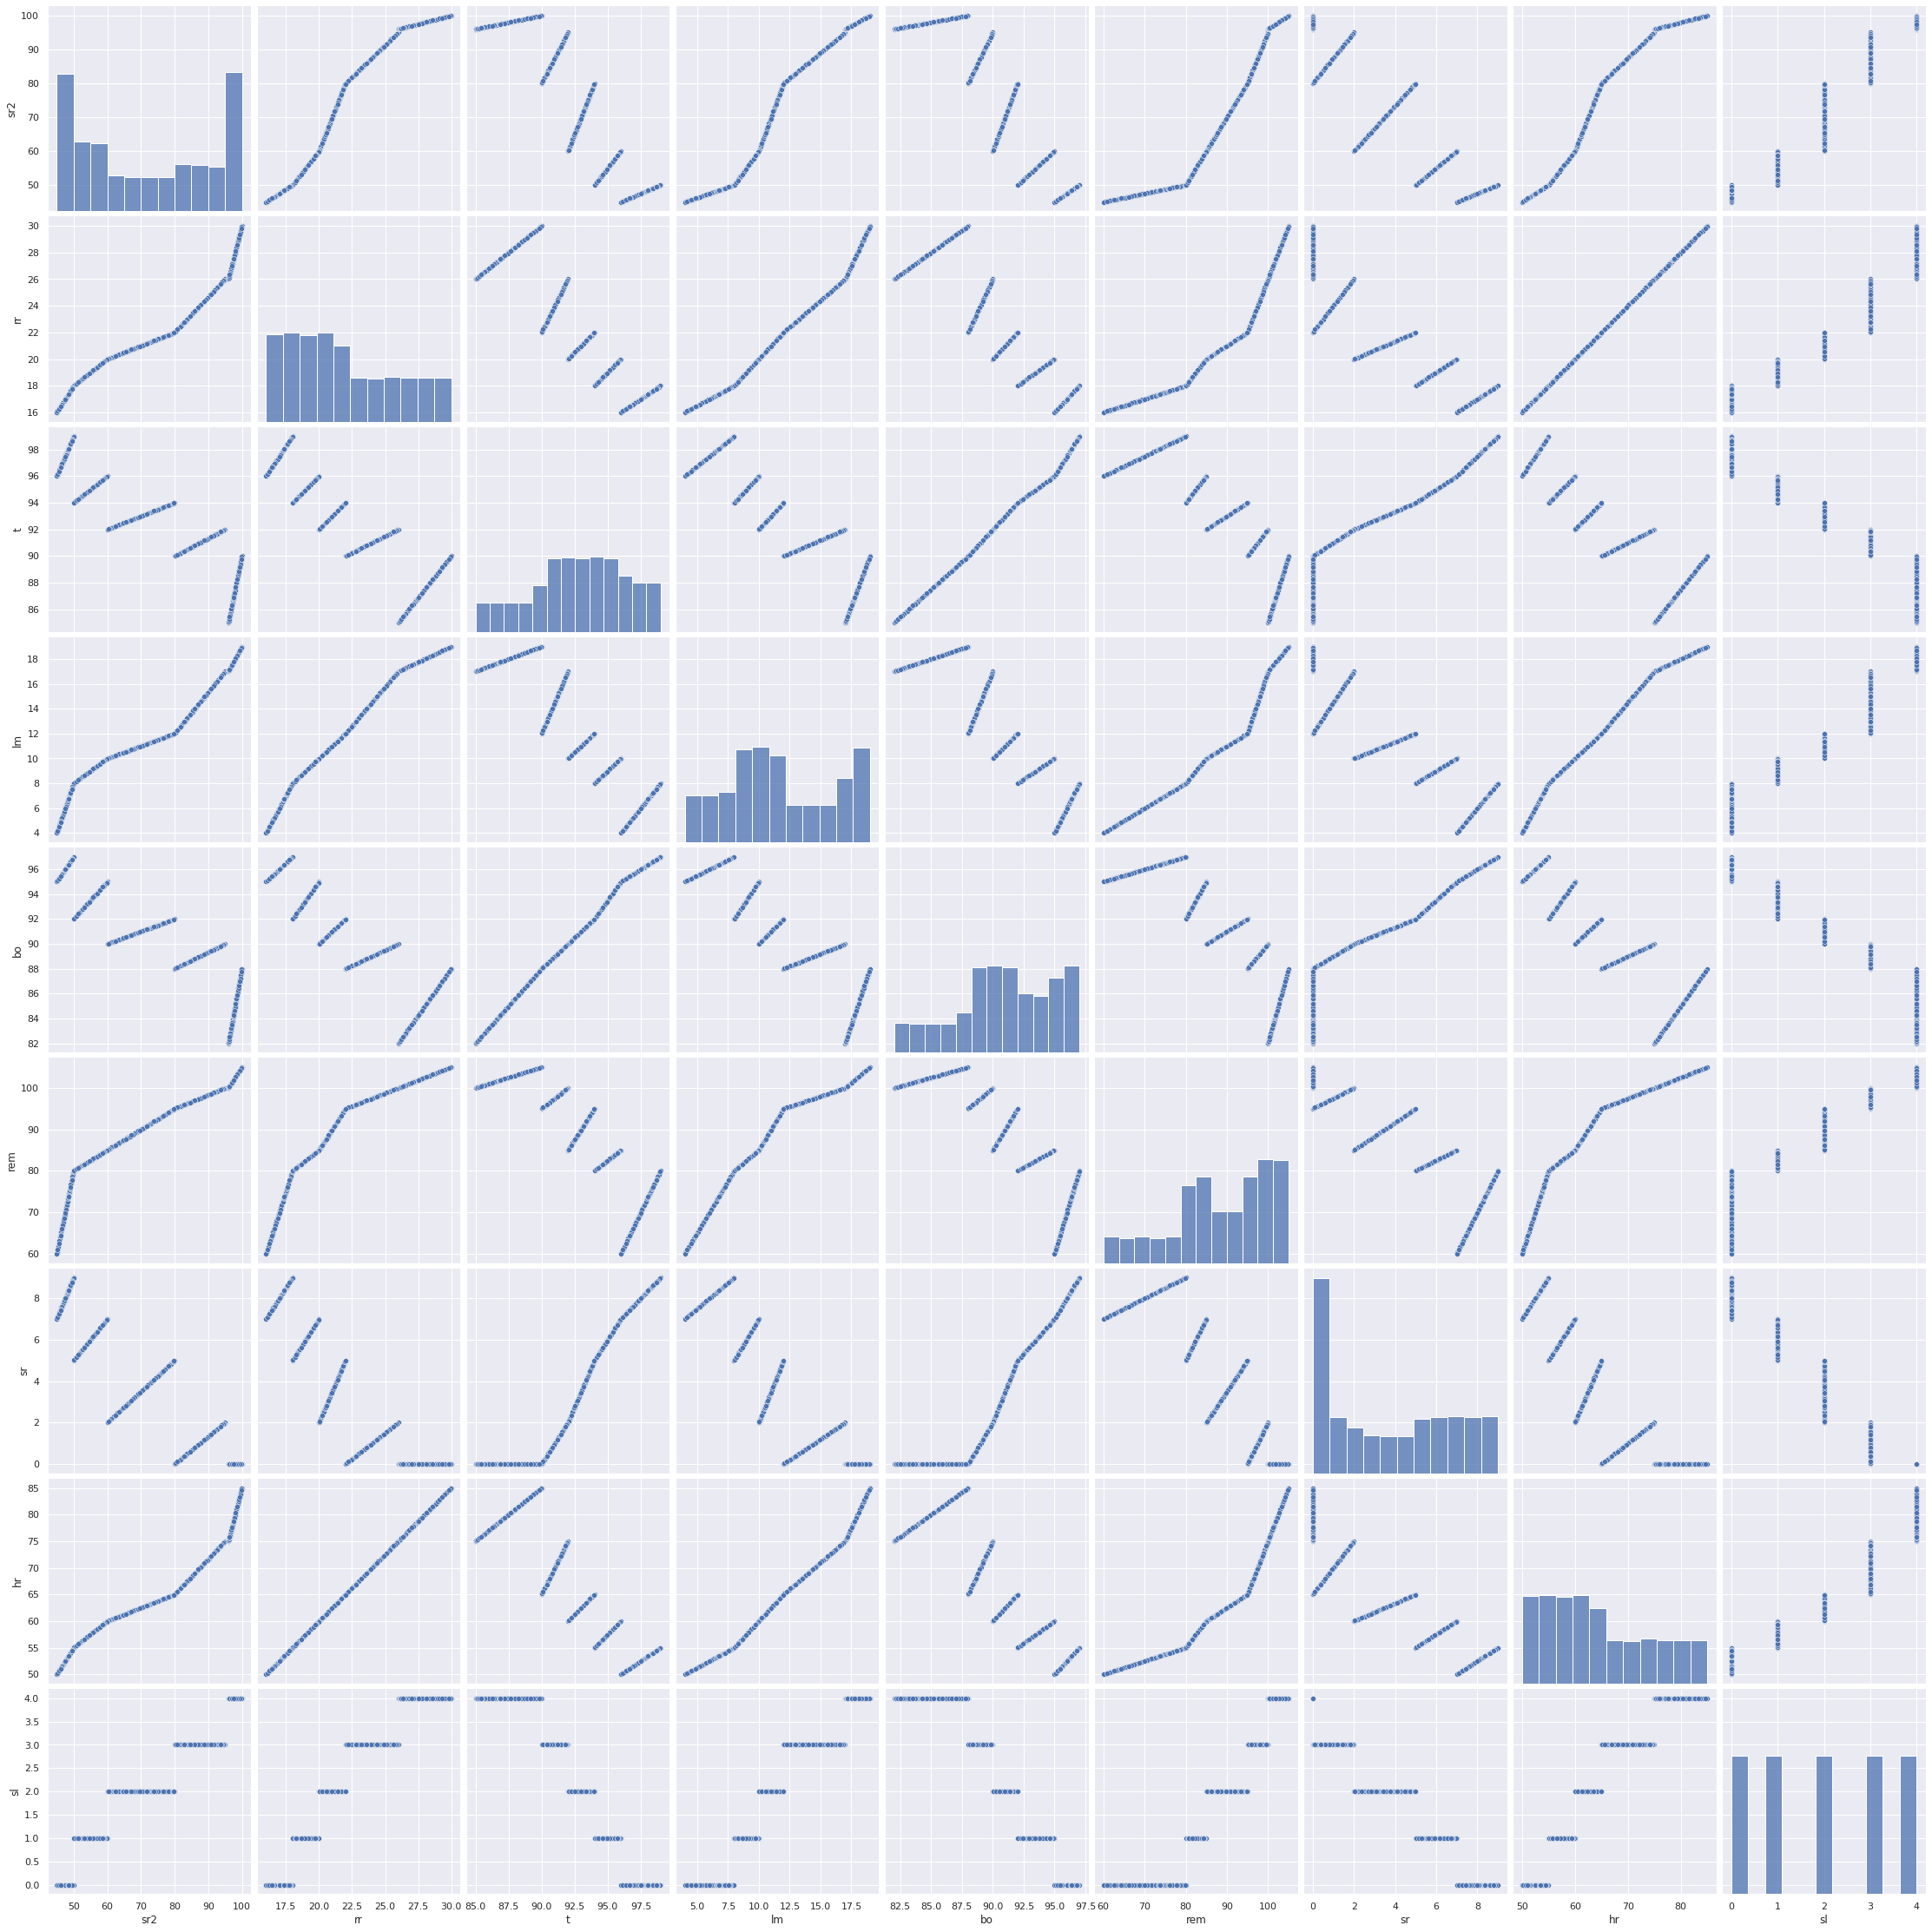

In [15]:
sns.set()
cols = ['sr2', 'rr', 't', 'lm','bo', 'rem', 'sr', 'hr', 'sl']
sns.pairplot(df[cols], size = 3.5)
plt.show()

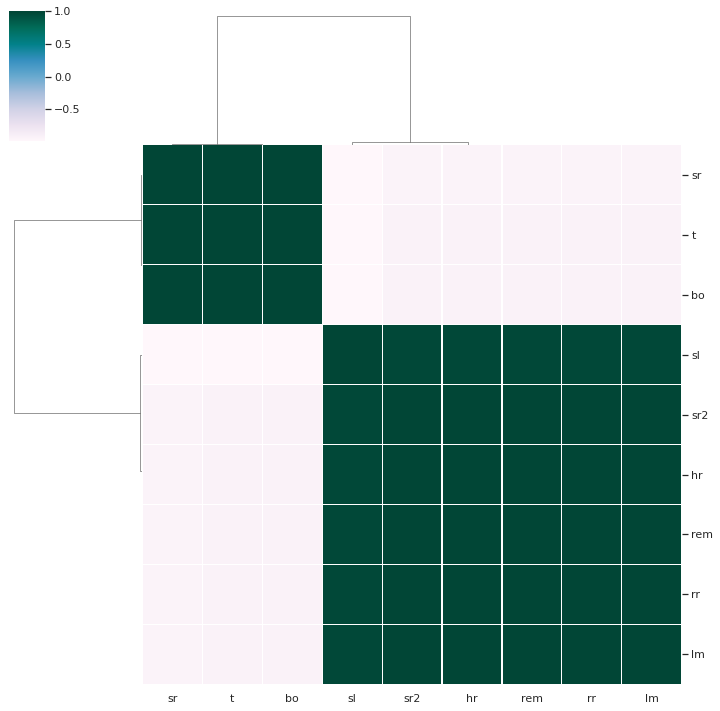

In [16]:
corr_mat = df.corr(method='spearman')
cg = sns.clustermap(corr_mat, cmap="PuBuGn", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg


(v) PCA analysis with visualiztion

- Data Standardiztion and PCA analysis

In [17]:
df_st = StandardScaler().fit_transform(df)
pd.DataFrame(df_st, columns = df.columns ).head(2)

,sr2,rr,t,lm,bo,rem,sr,hr,sl
0,1.15,0.98,-0.27,1.14,-0.27,0.93,-0.61,0.98,0.71
1,1.04,0.83,-0.35,0.97,-0.35,0.87,-0.70,0.83,0.71


In [18]:
pca_out = PCA().fit(df_st) #getting the component varienne 
# Proportion of the vatince we can see.

pca_out.explained_variance_ratio_


array([9.43547705e-01, 3.64830620e-02, 1.10726528e-02, 5.64969247e-03,
       2.61952664e-03, 4.36379518e-04, 1.82665036e-04, 8.31660769e-06,
       1.68649286e-32])

In [19]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.9435477 , 0.98003077, 0.99110342, 0.99675311, 0.99937264,
       0.99980902, 0.99999168, 1.        , 1.        ])

In [20]:
loadings = pca_out.components_
num_pc = pca_out.n_features_

pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
sr2,-0.34,-0.20,-0.00,-0.24,0.88,-0.00,-0.02,-0.11,-0.00
rr,-0.34,-0.30,0.36,-0.13,-0.25,-0.24,-0.10,-0.15,-0.71
t,0.33,-0.49,-0.21,-0.25,-0.03,0.08,-0.64,0.35,0.00
lm,-0.34,-0.29,0.09,0.16,-0.12,0.83,0.17,0.20,0.00
bo,0.33,-0.48,-0.20,-0.37,-0.08,-0.06,0.68,-0.12,-0.00
rem,-0.33,-0.29,-0.69,0.48,-0.09,-0.20,-0.05,-0.22,0.00
sr,0.33,-0.35,0.41,0.66,0.26,-0.20,0.12,0.20,-0.00
hr,-0.34,-0.30,0.36,-0.13,-0.25,-0.24,-0.10,-0.15,0.71
sl,-0.34,0.08,-0.12,-0.09,-0.03,-0.33,0.25,0.82,-0.00


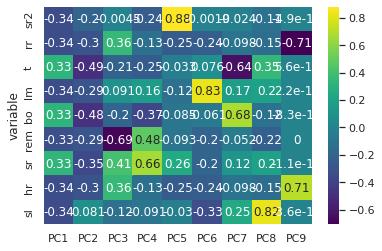

In [21]:
ax = sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.show()

b. data preparation

In [22]:
df.isnull().sum()   #Checking the null values

sr2    0
rr     0
t      0
lm     0
bo     0
rem    0
sr     0
hr     0
sl     0
dtype: int64

c. designing the test

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
#a linear model, Ridge Classifier. 

In [24]:
scaler = StandardScaler()

In [25]:
from sklearn.linear_model import RidgeClassifier

In [26]:
Stress_Levels = ['Low','Medium Low','Medium','Medium High','High']
Feature_Coefficients = pd.DataFrame()
for i in range(0,5):
    SleepStress_Pred = df.copy()
    SleepStress_Pred['sl'] = SleepStress_Pred['sl'].apply(lambda x: 1 if x==i else 0)
    X = SleepStress_Pred.drop('sl',axis=1)
    y = SleepStress_Pred['sl']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=100)
    
    X_train = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train,columns=X.columns)
    
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test,columns=X.columns)
    
    Model = RidgeClassifier(random_state=100)
    
    params = {'alpha':[10000,1000,100, 10, 1.0, 0.1, 0.01,0.001,0.0001]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
    
    Feature_Coefficients['Feature'] = X_train.columns
    Feature_Coefficients[Stress_Levels[i]] = Model_best.coef_[0]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 0.8677248677248677
Test Accuracy : 0.8452380952380952
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 1.0
Test Accuracy : 1.0


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


In [27]:
Feature_Coefficients.set_index('Feature',inplace=True)
Feature_Coefficients.head(10)

,Low,Medium Low,Medium,Medium High,High
Feature,,,,,
sr2,1.10,-2.54,0.57,0.99,-0.03
rr,0.40,-0.57,0.88,-0.53,0.21
t,4.25,-6.91,2.47,0.43,-0.19
lm,-0.50,2.47,-4.39,0.28,0.09
bo,-3.87,6.25,-2.70,0.61,-0.21
rem,-1.64,1.05,2.00,-0.02,-0.16
sr,-0.01,0.76,0.10,-1.11,0.14
hr,0.40,-0.57,0.88,-0.53,0.21


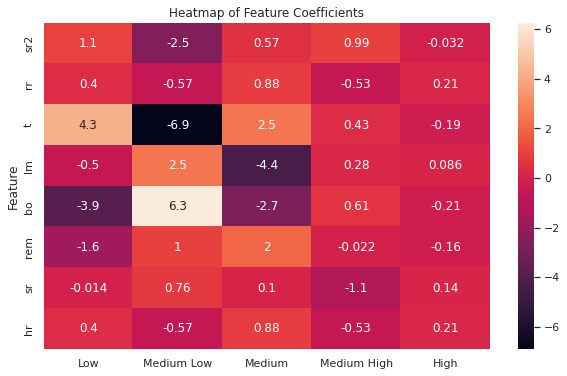

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(Feature_Coefficients,annot=True)
plt.title('Heatmap of Feature Coefficients')
plt.show()

#With the feature coefficients for all the various stress levels. This analysis is useful for understanding feature and stress level relationship. 

In [ ]:
from scipy import stats
df[["sr2","rr","t","lm"]].describe()
ttest,pval1 = stats.ttest_rel(df['sr2'], df['rr'], df['t'], df['lm'])
print(pval1)
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

In [ ]:
df[["sr2","rr","t","lm"]].describe()
ttest,pval2 = stats.ttest_rel(df['bo'], df['rem'], df['sr'], df['hr'])
print(pval2)
if pval2<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

In [29]:
df.drop_duplicates(inplace=True)
df.shape

(630, 9)

In [30]:
df.rename(columns = {'sr2' : 'snoring range' ,'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sr.1':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'}, inplace = True)
df.head()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,snoring rate,heart rate,stress level
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,0


In [2]:
!pip install lazypredict

     |████████████████████████████████| 127.6 MB 14 kB/s 
     |████████████████████████████████| 14.5 MB 17.6 MB/s 
     |████████████████████████████████| 10.1 MB 31.4 MB/s 
     |████████████████████████████████| 72 kB 515 kB/s 
     |████████████████████████████████| 25.9 MB 2.5 MB/s 
     |████████████████████████████████| 248 kB 34.4 MB/s 
     |████████████████████████████████| 269 kB 45.2 MB/s 
     |████████████████████████████████| 1.2 MB 37.1 MB/s 
     |████████████████████████████████| 302 kB 16.7 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=83c0396f97d386a732f5de3bb8e2a16a37e31cddc6d8913a1352b6d4f036d816
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
   

In [20]:
pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [22]:
pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 4.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [31]:
from lazypredict.Supervised import LazyClassifier

In [32]:
y = df.pop('stress level')
X = df

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

In [34]:
clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.41it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.08
KNeighborsClassifier,1.00,1.00,None,1.00,0.03
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.04
NuSVC,1.00,1.00,None,1.00,0.06
NearestCentroid,1.00,1.00,None,1.00,0.02
LogisticRegression,1.00,1.00,None,1.00,0.08
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.05
LabelSpreading,1.00,1.00,None,1.00,0.11
LabelPropagation,1.00,1.00,None,1.00,0.06


In [35]:
predictions.head()

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,4,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,1
3,4,4,4,4,4,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,1,3,4,3,3,0,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [36]:
from sklearn.metrics import classification_report
for i in predictions.columns.tolist():
    print('\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

	 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.32      1.00      0.49        25
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       1.00      0.96      0.98        25

    accuracy                           0.58       126
   macro avg       0.46      0.58      0.49       126
weighted avg       0.46      0.58      0.49       126
 

	 BaggingClassifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      0.96      0.98        25
           3       0.96      1.00      0.98        26
           4       1.00      1.00      1.00        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0

Most of the models are giving as overfitting however Decision Tree classifier and ridge classifier are giving acceptable accuracy.